# Jupyter notebook test
This is a test for the integration of a jupyter notebook in github pages

\begin{equation}
 (k,u) \longmapsto J(k,u)
\end{equation}


In [20]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import matplotlib as mpl
from matplotlib import cm
plt.style.use('seaborn')
mpl.rcParams['image.cmap'] = u'viridis'
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

We are first going to define the function that we are going to torture

In [21]:
def branin_2d(X, switch=False):
        """ Scaled branin function:
        global minimizers are
        [0.124, 0.818], [0.54277, 0.1513], [0.96133, 0.16466]
        """
        X = np.atleast_2d(X)
        y, x = X[:, 1], X[:, 0]
        if switch:
            x, y = y, x
        x2 = 15 * y
        x1 = 15 * x - 5
        quad = (x2 - (5.1 / (4 * np.pi**2)) * x1**2 + (5 / np.pi) * x1 - 6)**2
        cosi = (10 - (10 / np.pi * 8)) * np.cos(x1) - 44.81
        return (quad + cosi) / (51.95) + 2.0

ngrid = 200
X_, Y_ = np.linspace(0, 1, ngrid), np.linspace(0, 1, 2 * ngrid)
xx, yy = np.meshgrid(X_, Y_, indexing = 'ij')
pair_of_points = np.array([xx, yy]).T.reshape(-1, 2, order = 'F')



In [22]:
p = .99
out_t = branin_2d(pair_of_points).reshape(ngrid, ngrid * 2)
kstar_t = out_t.argmin(0)
Jstar_t = out_t.min(0)
rho_t = (out_t / Jstar_t[np.newaxis, :])
alpha_p_t = np.quantile(rho_t, p, axis=1)

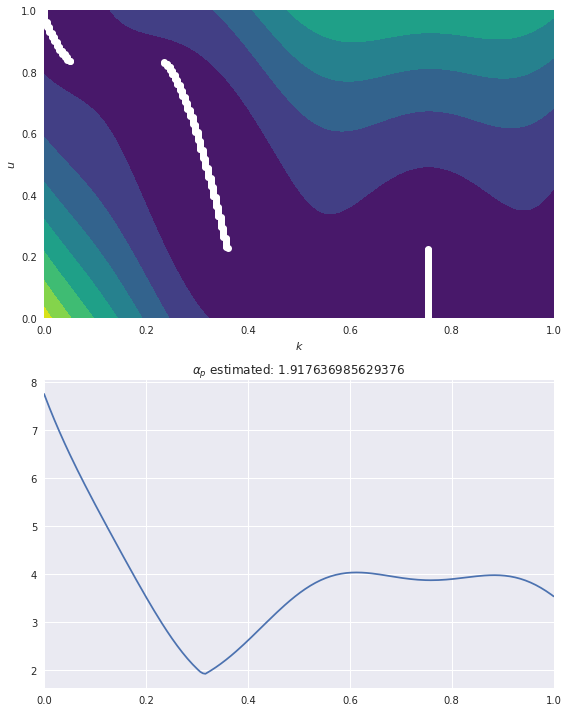

In [27]:
plt.figure(figsize=(8,10))
plt.subplot(2, 1, 1)
plt.contourf(xx, yy, out_t)
plt.plot(X_[kstar_t], Y_, 'o', color='white')
plt.xlabel(r'$k$')
plt.ylabel(r'$u$')
plt.subplot(2, 1, 2)
plt.plot(X_, alpha_p_t)
# plt.plot(Y_, Jstar_t)     #
plt.xlim((0, 1))
plt.title(r'$\alpha_p$ estimated: {}'.format(alpha_p_t.min()))
plt.tight_layout()
plt.show()